In [2]:
from pathlib import Path
from Bio.PDB import PDBList, PDBParser
import os
from tqdm import tqdm
import warnings
import pandas as pd
from Bio import SeqIO
from dotenv import load_dotenv
import os
import requests
import time
import json
from Bio.PDB.ic_rebuild import structure_rebuild_test
import numpy as np
import sys

load_dotenv()

True

In [2]:
WINDOW_SIZE = 5
PDBMINE_URL = os.getenv("PDBMINE_URL")
casp_protein_id = 'T1024'
pdb_code = '6t1z'

In [3]:
amino_acid_codes = {
    "ALA": "A",
    "ARG": "R",
    "ASN": "N",
    "ASP": "D",
    "CYS": "C",
    "GLN": "Q",
    "GLU": "E",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LEU": "L",
    "LYS": "K",
    "MET": "M",
    "PHE": "F",
    "PRO": "P",
    "SER": "S",
    "THR": "T",
    "TRP": "W",
    "TYR": "Y",
    "VAL": "V"
}

In [4]:
# Get X-ray pdb
pdbl = PDBList()
parser = PDBParser()
xray_fn = pdbl.retrieve_pdb_file(pdb_code, pdir='pdb', file_format='pdb', obsolete=False)

# Get CASP predictions
predictions_url = f'https://predictioncenter.org/download_area/CASP14/predictions/regular/{casp_protein_id}.tar.gz'
predictions_dir = Path(f'./casp-predictions/')
predictions_dir.mkdir(exist_ok=True)
os.system(f'wget -O {predictions_dir}/{casp_protein_id}.tar.gz {predictions_url}')
os.system(f'tar -xvf {predictions_dir}/{casp_protein_id}.tar.gz -C {predictions_dir}')

# Get CASP results
results_url = 'https://predictioncenter.org/download_area/CASP14/results/tables/casp14.res_tables.T.tar.gz'
results_dir = Path('casp-results')
results_dir.mkdir(exist_ok=True)
os.system(f'wget -O {results_dir / "casp14.res_tables.T.tar.gz"} {results_url}')
os.system(f'tar -xvf {results_dir / "casp14.res_tables.T.tar.gz"} -C {results_dir}')
results_file = results_dir / f'{casp_protein_id}.txt'

Structure exists: 'pdb/pdb6t1z.ent' 


--2024-04-04 16:16:46--  https://predictioncenter.org/download_area/CASP14/predictions/regular/T1024.tar.gz
Resolving predictioncenter.org (predictioncenter.org)... 128.120.136.155
Connecting to predictioncenter.org (predictioncenter.org)|128.120.136.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28668808 (27M) [application/x-gzip]
Saving to: ‘casp-predictions/T1024.tar.gz’

     0K .......... .......... .......... .......... ..........  0%  354K 79s
    50K .......... .......... .......... .......... ..........  0%  737K 58s
   100K .......... .......... .......... .......... ..........  0% 11.8M 40s
   150K .......... .......... .......... .......... ..........  0%  789K 38s
   200K .......... .......... .......... .......... ..........  0% 11.5M 31s
   250K .......... .......... .......... .......... ..........  1% 11.3M 26s
   300K .......... .......... .......... .......... ..........  1% 12.0M 23s
   350K .......... .......... .......... .......... 

T1024/
T1024/T1024TS226_4
T1024/T1024TS131_2
T1024/T1024TS026_2
T1024/T1024TS075_5
T1024/T1024TS242_2
T1024/T1024TS050_5
T1024/T1024TS343_2
T1024/T1024TS378_1
T1024/T1024TS138_3
T1024/T1024TS488_1
T1024/T1024TS324_4
T1024/T1024TS125_4
T1024/T1024TS435_4
T1024/T1024TS067_2
T1024/T1024TS473_3
T1024/T1024TS070_5
T1024/T1024TS376_1
T1024/T1024TS428_2
T1024/T1024TS460_3
T1024/T1024TS033_4
T1024/T1024TS222_1
T1024/T1024TS335_3
T1024/T1024TS293_5
T1024/T1024TS096_1
T1024/T1024TS032_4
T1024/T1024TS301_1
T1024/T1024TS216_1
T1024/T1024TS071_1
T1024/T1024TS487_2
T1024/T1024TS326_4
T1024/T1024TS238_1
T1024/T1024TS170_5
T1024/T1024TS131_1
T1024/T1024TS458_5
T1024/T1024TS018_2
T1024/T1024TS132_1
T1024/T1024TS254_2
T1024/T1024TS369_1
T1024/T1024TS032_1
T1024/T1024TS403_4
T1024/T1024TS458_1
T1024/T1024TS369_5
T1024/T1024TS319_3
T1024/T1024TS238_5
T1024/T1024TS349_2
T1024/T1024TS473_2
T1024/T1024TS437_4
T1024/T1024TS257_1
T1024/T1024TS101_3
T1024/T1024TS200_4
T1024/T1024TS379_3
T1024/T1024TS349_4
T1024

--2024-04-04 16:16:50--  https://predictioncenter.org/download_area/CASP14/results/tables/casp14.res_tables.T.tar.gz
Resolving predictioncenter.org (predictioncenter.org)... 128.120.136.155
Connecting to predictioncenter.org (predictioncenter.org)|128.120.136.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5111789 (4.9M) [application/x-gzip]
Saving to: ‘casp-results/casp14.res_tables.T.tar.gz’

     0K .......... .......... .......... .......... ..........  1%  358K 14s
    50K .......... .......... .......... .......... ..........  2%  740K 10s
   100K .......... .......... .......... .......... ..........  3% 11.6M 7s
   150K .......... .......... .......... .......... ..........  4%  798K 7s
   200K .......... .......... .......... .......... ..........  5% 10.7M 5s
   250K .......... .......... .......... .......... ..........  6% 11.5M 4s
   300K .......... .......... .......... .......... ..........  7% 11.7M 4s
   350K .......... .......... ........

T1024-D1.txt
T1024-D2.txt
T1024.txt
T1025-D1.txt
T1026-D1.txt
T1027-D1.txt
T1028-D1.txt
T1029-D1.txt
T1030-D1.txt
T1030-D2.txt
T1030.txt
T1031-D1.txt
T1032-D1.txt
T1033-D1.txt
T1034-D1.txt
T1035-D1.txt
T1036s1-D1.txt
T1037-D1.txt
T1038-D1.txt
T1038-D2.txt
T1038.txt
T1039-D1.txt
T1040-D1.txt
T1041-D1.txt
T1042-D1.txt
T1043-D1.txt
T1045s1-D1.txt
T1045s2-D1.txt
T1046s1-D1.txt
T1046s2-D1.txt
T1047s1-D1.txt
T1047s2-D1.txt
T1047s2-D2.txt
T1047s2-D3.txt
T1047s2.txt
T1049-D1.txt
T1050-D1.txt
T1050-D2.txt
T1050-D3.txt
T1050.txt
T1052-D1.txt
T1052-D2.txt
T1052-D3.txt
T1052.txt
T1053-D1.txt
T1053-D2.txt
T1053.txt
T1054-D1.txt
T1054.txt
T1055-D1.txt
T1056-D1.txt
T1057-D1.txt
T1058-D1.txt
T1058-D2.txt
T1058.txt
T1060s2-D1.txt
T1060s3-D1.txt
T1061-D1.txt
T1061-D2.txt
T1061-D3.txt
T1061.txt
T1064-D1.txt
T1065s1-D1.txt
T1065s2-D1.txt
T1067-D1.txt
T1068-D1.txt
T1070-D1.txt
T1070-D2.txt
T1070-D3.txt
T1070-D4.txt
T1070.txt
T1073-D1.txt
T1074-D1.txt
T1076-D1.txt
T1078-D1.txt
T1079-D1.txt
T1080-D1.txt
T108

.. .......... 94% 11.5M 0s
  4700K .......... .......... .......... .......... .......... 95% 11.7M 0s
  4750K .......... .......... .......... .......... .......... 96% 11.6M 0s
  4800K .......... .......... .......... .......... .......... 97% 8.62M 0s
  4850K .......... .......... .......... .......... .......... 98% 11.5M 0s
  4900K .......... .......... .......... .......... .......... 99% 11.6M 0s
  4950K .......... .......... .......... .......... .         100% 15.7M=0.8s

2024-04-04 16:16:51 (6.32 MB/s) - ‘casp-results/casp14.res_tables.T.tar.gz’ saved [5111789/5111789]



In [5]:
# Get structures
xray = parser.get_structure(pdb_code, xray_fn)

predicted_structures = []
for prediction_pdb in tqdm((predictions_dir / casp_protein_id).iterdir()):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        predicted_structures.append(parser.get_structure(prediction_pdb.name, prediction_pdb))

512it [00:22, 23.05it/s]


In [6]:
results = pd.read_csv(results_file, delim_whitespace=True)
results = results[results.columns[1:]]

/tmp/ipykernel_8510/1205245770.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  results = pd.read_csv(results_file, delim_whitespace=True)


In [8]:
# Get Phi-Psi distribution from PDBMine
for record in SeqIO.parse(xray_fn, "pdb-seqres"):
    print("Record id %s, chain %s" % (record.id, record.annotations["chain"]))
    print(record)
residue_chain = str(record.seq)
code_length = 1
broken_chains = []
# break into sections of length 100
for i in range(0, len(residue_chain), 100-WINDOW_SIZE+1):
    broken_chains.append(residue_chain[i:i+100])

matches = {}
for chain in tqdm(broken_chains):
    if len(chain) < WINDOW_SIZE:
        continue
    response = requests.post(
        PDBMINE_URL + '/v1/api/query',
        json={
            "residueChain": chain,
            "codeLength": code_length,
            "windowSize": WINDOW_SIZE
        }
    )
    assert(response.ok)
    print(response.json())
    query_id = response.json().get('queryID')
    assert(query_id)

    time.sleep(15)
    while(True):
        response = requests.get(PDBMINE_URL + f'/v1/api/query/{query_id}')
        if response.ok:
            matchesi = response.json()['frames']
            break
        else:
            print('Waiting')
            time.sleep(15)
    print('Received matches')
    matches.update(matchesi)
json.dump(matches, open('matches.json', 'w'))

Record id 6T1Z:A, chain A
ID: 6T1Z:A
Name: 6T1Z:A
Description: UNP:Q48658 Q48658_9LACT
Database cross-references: UNP:Q48658, UNP:Q48658_9LACT
Number of features: 0
/chain=A
/molecule_type=protein
Seq('GKEFWNLDKNLQLRLGIVFLGAFSYGTVFSSMTIYYNQYLGSAITGILLALSAV...FQG')


  0%|          | 0/5 [00:00<?, ?it/s]

{'status': 'Running', 'queryID': '3c4aa22e-f2ae-11ee-8b85-0242ac110002'}
Waiting
Waiting
Waiting


 20%|██        | 1/5 [01:00<04:01, 60.27s/it]

Received matches
{'status': 'Running', 'queryID': '603654f6-f2ae-11ee-8b85-0242ac110002'}
Waiting
Waiting
Waiting


 40%|████      | 2/5 [02:00<03:00, 60.27s/it]

Received matches
{'status': 'Running', 'queryID': '84226ce8-f2ae-11ee-8b85-0242ac110002'}
Waiting
Waiting


 60%|██████    | 3/5 [02:45<01:46, 53.36s/it]

Received matches
{'status': 'Running', 'queryID': '9f0be705-f2ae-11ee-8b85-0242ac110002'}
Waiting
Waiting
Waiting


 80%|████████  | 4/5 [03:45<00:56, 56.10s/it]

Received matches
{'status': 'Running', 'queryID': 'c2fc3594-f2ae-11ee-8b85-0242ac110002'}


100%|██████████| 5/5 [04:01<00:00, 48.22s/it]

Received matches


In [9]:
phi_psi_mined = pd.DataFrame(columns=['res','phi', 'psi', 'seq', 'idx_in_seq', 'chain', 'protein_id'])
for seq_win,v in tqdm(matches.items()):
    seq = seq_win[4:]
    for protein,seq_matches in v.items():
        # get phi and psi of each residue in window for each match
        protein_id, chain = protein.split('_')
        if protein_id == pdb_code:
            continue
        for seq_match in seq_matches:
            for i,match in enumerate(seq_match):
                res, phi, psi = match['residueName'], match['phi'], match['psi']
                phi_psi_mined.loc[len(phi_psi_mined)] = [res, phi, psi, seq, i, chain, protein_id]
phi_psi_mined.to_csv('phi_psi_mined.csv', index=False)

100%|██████████| 407/407 [34:34<00:00,  5.10s/it]


In [ ]:
# Get phi_psi's of each prediction

def get_phi_psi(protein_id, protein, window_size):
    phi_psi = pd.DataFrame(columns=['res','phi', 'psi', 'seq', 'idx_in_seq', 'chain', 'pos_in_chain', 'protein_id'])
    chain = list(prediction[0].get_chains())[0]
    chain.atom_to_internal_coordinates(verbose=True)
    resultDict = structure_rebuild_test(chain)
    if not resultDict['pass']:
        print(f"Failed {protein_id} {chain.id}")
        raise Exception('Failed to rebuild')
    residues = list(chain.get_residues())
    j = 0
    seq = ''
    for i in range(len(residues)):
        # Convert 3 char codes to 1 char codes
        if j == 0 and i+window_size < len(residues):
            seq = ''.join([amino_acid_codes.get(r.resname, 'X') for r in residues[i:i+window_size]])
        key = amino_acid_codes.get(residues[i].resname, 'X')
        if not residues[i].internal_coord:
            psi,phi = np.nan, np.nan
        else:
            psi = residues[i].internal_coord.get_angle("psi")
            phi = residues[i].internal_coord.get_angle("phi")
        psi = psi if psi else np.nan
        phi = phi if phi else np.nan
        phi_psi.loc[len(phi_psi)] = [key, phi, psi, seq, j, chain.id, residues[i].get_full_id()[3][1], protein.id]
        j = (j+1) % window_size
    return phi_psi 

phi_psi_predictions = pd.DataFrame(columns=['res','phi', 'psi', 'seq', 'idx_in_seq', 'chain', 'pos_in_chain', 'protein_id'])
for prediction in tqdm(predicted_structures):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        try:
            phi_psi_predictions = pd.concat([phi_psi_predictions, get_phi_psi(prediction.id, prediction, WINDOW_SIZE)], ignore_index=True)
        except Exception as e:
            print(e)
phi_psi_predictions.to_csv('phi_psi_predictions.csv', index=False)

In [ ]:
phi_psi_predictions = pd.read_csv('phi_psi_predictions.csv')

# Results

In [3]:
phi_psi_mined = pd.read_csv('phi_psi_mined.csv')
phi_psi_predictions = pd.read_csv('phi_psi_predictions.csv')

In [6]:
phi_psi_mined_filtered = phi_psi_mined.copy()
phi_psi_mined_filtered = phi_psi_mined_filtered[phi_psi_mined_filtered.protein_id != pdb_code.upper()]
phi_psi_mined_filtered['source'] = 'Query (PDBMine)'
phi_psi_predictions['source'] = 'Prediction'

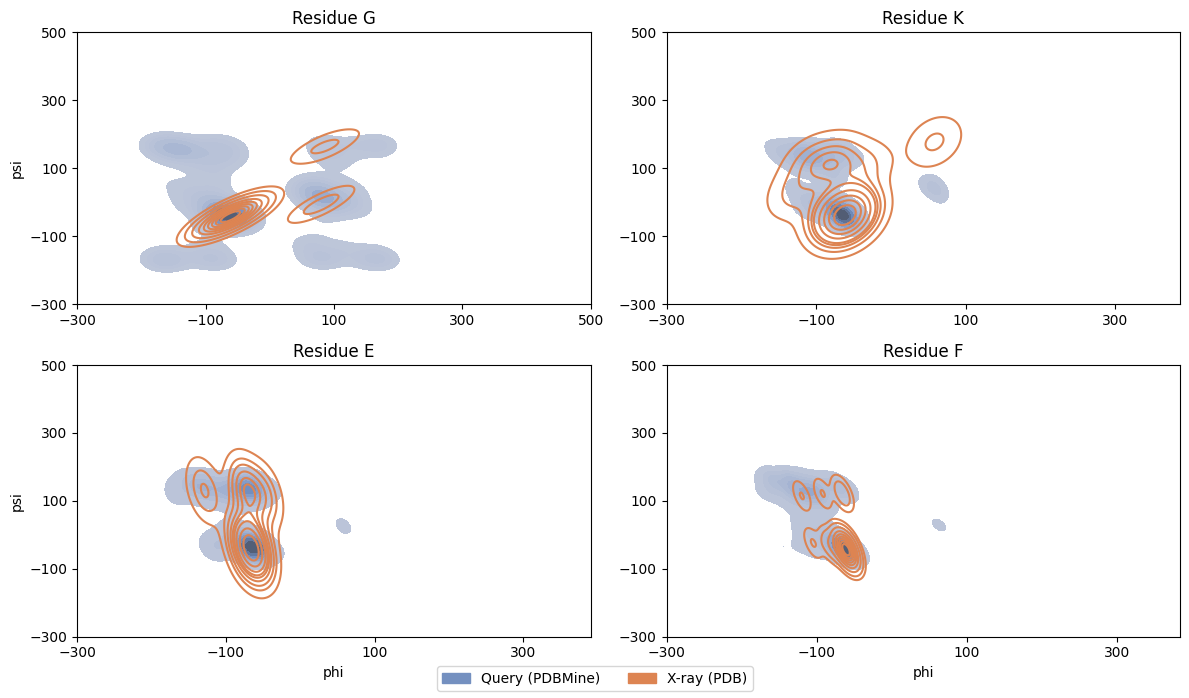

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Plot PDB

fig, axes = plt.subplots(2,2,figsize=(12,7))

m=0
for i,key in enumerate(phi_psi_mined.res.unique()[m:m+4]):
    ax = axes.flatten()[i]
    # alphafold: T1024TS427_1	
    phi_psi_alpha = phi_psi_predictions[(phi_psi_predictions.res == key) & (phi_psi_predictions.protein_id == 'T1024TS427_1')]
    phi_psi_dist = phi_psi_mined_filtered[phi_psi_mined_filtered.res == key]
    sns.kdeplot(data=phi_psi_dist, x='phi', y='psi', ax=ax, fill=True, color='#7490c0', legend=True)
    sns.kdeplot(data=phi_psi_alpha, x='phi', y='psi', ax=ax, fill=False, zorder=10, color='#dd8452', legend=True)

    ax.set_title(f'Residue {key}')
    ax.set_xticks(ax.get_xticks()[::2])
    ax.set_yticks(ax.get_yticks()[::2])
    ax.set_xlabel('phi' if i > 1 else '')
    ax.set_ylabel('psi' if i % 2 == 0 else '')


# legend on bottom middle
patch1 = mpatches.Patch(color='#7490c0', label='Query (PDBMine)')
patch2 = mpatches.Patch(color='#dd8452', label='X-ray (PDB)')
fig.legend(handles=[patch1, patch2], loc='lower center', ncol=2)
# fig.suptitle(f'Distribution of phi, psi angles for the residues in {protein_id_pdb}')
plt.tight_layout()

In [17]:
def get_mahalanobis_dist(x, dist):
    # x should be 1 x n_features
    # dist should be n_obs x n_features
    icov = np.linalg.inv(np.cov(dist.T))
    md = (x - dist.mean(axis=0)) @ icov @ (x - dist.mean(axis=0))
    if md < 0:
        print(x, dist.mean(axis=0), icov)
    return np.sqrt(md)

def get_maha_for_row(dist_df, row):
    res = row['res']
    if row.name % 100000 == 0:
        print(row.name)
    if res == 'X':
        return np.nan
    phi_psi = dist_df.loc[dist_df.res == res, ['phi','psi']].dropna().values
    return get_mahalanobis_dist(row[['phi','psi']].values, phi_psi)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    phi_psi_predictions['mahalanobis_dist'] = phi_psi_predictions.apply(lambda x: get_maha_for_row(phi_psi_mined_filtered, x), axis=1)

0
100000


In [78]:
phi_psi_predictions.to_csv('phi_psi_predictions_mahalanobis.csv', index=False)
phi_psi_predictions = pd.read_csv('phi_psi_predictions_mahalanobis.csv')

In [84]:
# mean_maha
mean_maha = phi_psi_predictions.groupby('protein_id').mean(numeric_only=True).sort_values('mahalanobis_dist')
mean_maha = mean_maha.join(results.set_index('Model')[['RMS_ALL']], how='right')
sns.scatterplot(data=mean_maha, x='mahalanobis_dist', y='RMS_ALL')